# Measurements of Transmittance

## Procedure: 

#### - Turn on the instrument (~2h)
#### - Baseline (every ~1h - autocorrection of the instrument)
#### - Air measurement (without cuvette)
#### - Sample measurement (cuvette)
Ciascuna misura consiste in tre campionamenti in cui si scansiona il range di lunghezze d'onda [250 - 650]nm


Di seguito l'elenco delle misure effettuate:

- Misura di aria (riferimento)
- Misura della cuvette vuota 
- Misura di acqua pura prodotta in Lab. di chimica (riferimento)
- Misura di acqua da diversi punti dell'impianto: 
   -  Nanofiltro 1 (NF1) - 25/26
   -  Nanofiltro 2 (NF2) - 25/26
   -  Ultrafiltro 2 (UF2) - 25/26
   -  Ultrafiltro 1 (UF1) - 26
   -  DI product (DI) - 26
   -  Neutron Veto (NV) - 26



### Obiettivi della misura: 
- Verificare la praticità dello strumento
- Verificare la riproducibilità delle misure
- Differenze di transmittanza tra i vari punti dell'impianto
- Verificare la compatibilità delle proprietà dell'acqua dell'impianto con quella del NV in vista dell'inserimento della WT nel loop (previsto domani - 27/10)
- Calcoli vari sulla lunghezza di assorbimento (avendo in questo caso anche il riferimento della cuvette vuota)

In [5]:
import numpy as np
import pandas as pd
from main import makingref
import matplotlib.pyplot as plt
import re 
import os

In [2]:
regex = re.compile(".csv")
list_of_csv = [str(x)[7:] for x in os.listdir("./transparency/mean/") if regex.search(x)]
print(np.unique(list_of_csv))

['Air-0.csv' 'Air-1.csv' 'Air-10.csv' 'Air-2.csv' 'Air-3.csv' 'Air-4.csv'
 'Air-5.csv' 'Air-6.csv' 'Air-7.csv' 'Air-8.csv' 'Air-9.csv' 'Empty-0.csv'
 'Empty-1.csv' 'Empty-2.csv' 'Empty-3.csv' 'RefWater-0.csv'
 'RefWater-1.csv' 'RefWater-2.csv' 'RefWaterAfterBottle-0.csv'
 'RefWaterDirect-0.csv' 'RefWaterDirect-1.csv' 'Water-DI-center-0.csv'
 'Water-NF1-center-1.csv' 'Water-NF1-center-2.csv'
 'Water-NF1-center-3.csv' 'Water-NF1-center-4.csv' 'Water-NF1-center.csv'
 'Water-NF1-close.csv' 'Water-NF2-center-1.csv' 'Water-NF2-center-2.csv'
 'Water-NF2-center-3.csv' 'Water-NF2-center.csv' 'Water-NF2-close.csv'
 'Water-NeutronVeto-center-0.csv' 'Water-UF1-center-0.csv'
 'Water-UF2product-center-0.csv' 'Water-UF2product-center-1.csv'
 'Water-UF2product-center-2.csv' 'Water-UF2product-center-3.csv'
 'Water-UF2product-center.csv' 'Water-UF2product-close.csv']


# Riproducibilità delle misure
Confronto tra misure prese in 25/10 e il 26/10

In [6]:
lambdas=np.arange(250,651)

In [10]:
# Acqua pura
reference = "RefWater"
regex = re.compile(".csv")
misure_acqua=[]
list_of_csv = [str(x) for x in os.listdir("./transparency/mean/") if regex.search(x)]
for i in list_of_csv:
    if reference in i:
        misure_acqua.append(i)
print(misure_acqua)

['221025-RefWater-0.csv', '221025-RefWater-1.csv', '221025-RefWaterDirect-0.csv', '221026-RefWater-0.csv', '221026-RefWater-2.csv', '221026-RefWaterAfterBottle-0.csv']


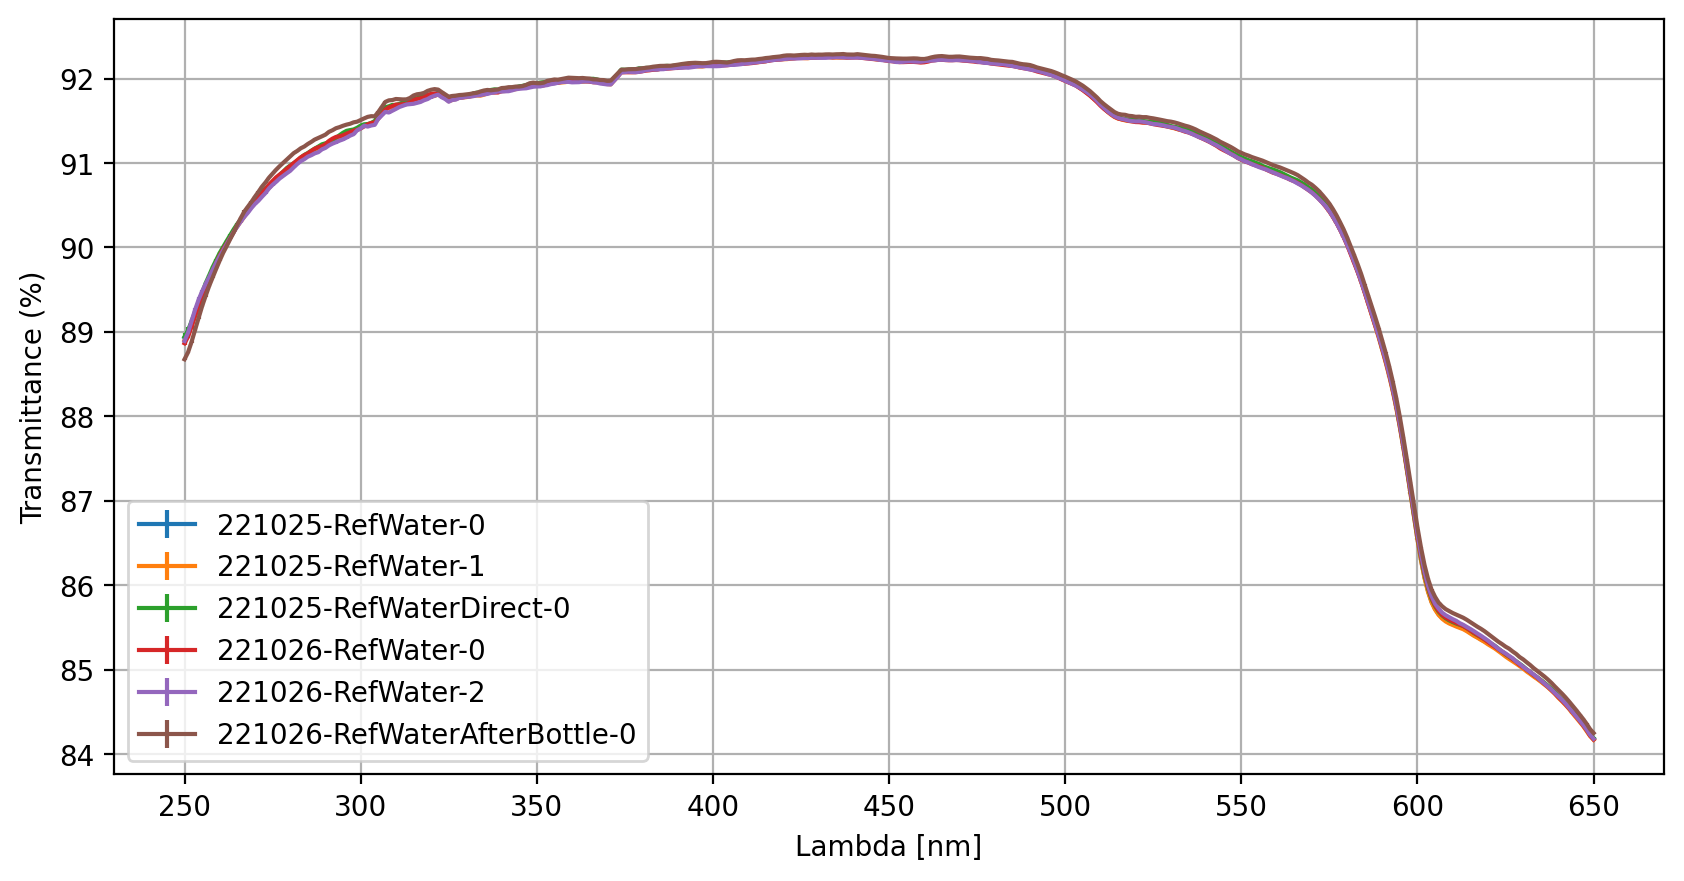

In [12]:
plt.figure(figsize=(10,5),dpi=200)
plt.xlabel("Lambda [nm]")
plt.ylabel("Transmittance (%)")
for i in misure_acqua:
    r,r_err = main.makingref("./transparency/mean/"+i)
    plt.errorbar(x=lambdas,y=r,yerr=r_err, label=i[:-4])
plt.grid()
plt.legend()
plt.show()

# Confronti tra punti diversi


In [21]:
# Acqua pura
reference = "RefWater"
data1="221026"
regex = re.compile(".csv")
misure=[]
list_of_csv = [str(x) for x in os.listdir("./transparency/mean/") if regex.search(x)]
for i in list_of_csv:
    if data1 in i:
        misure.append(i)
print(misure)

['221026-Air-0.csv', '221026-Air-1.csv', '221026-Air-10.csv', '221026-Air-2.csv', '221026-Air-3.csv', '221026-Air-4.csv', '221026-Air-5.csv', '221026-Air-6.csv', '221026-Air-7.csv', '221026-Air-8.csv', '221026-Air-9.csv', '221026-RefWater-0.csv', '221026-RefWater-2.csv', '221026-RefWaterAfterBottle-0.csv', '221026-Water-DI-center-0.csv', '221026-Water-NeutronVeto-center-0.csv', '221026-Water-NF1-center-1.csv', '221026-Water-NF1-center-2.csv', '221026-Water-NF1-center-3.csv', '221026-Water-NF1-center-4.csv', '221026-Water-NF2-center-1.csv', '221026-Water-NF2-center-2.csv', '221026-Water-NF2-center-3.csv', '221026-Water-NF2-center.csv', '221026-Water-UF1-center-0.csv', '221026-Water-UF2product-center-1.csv', '221026-Water-UF2product-center-2.csv', '221026-Water-UF2product-center-3.csv', '221026-Water-UF2product-center.csv']


In [22]:
reference_file="./transparency/mean/221026-RefWaterAfterBottle-0.csv"

#reference_file1 = "./transparency/mean/221025-RefWaterDirect-1.csv"
nv = "./transparency/mean/221026-Water-NeutronVeto-center-0.csv"
di = "./transparency/mean/221026-Water-DI-center-0.csv"
nf1 = "./transparency/mean/221026-Water-NF1-center-3.csv"
nf2 = "./transparency/mean/221026-Water-NF2-center-3.csv"
uf1 = "./transparency/mean/221026-Water-UF1-center-0.csv"
uf2 = "./transparency/mean/221026-Water-UF2product-center-3.csv"

#target_file1 = "./transparency/mean/221025-Water-NF1-close.csv"
r,r_err = main.makingref(reference_file)

t_nv,t_nv_err = main.makingref(nv)
t_di,t_di_err = main.makingref(di)
t_nf1,t_nf1_err = main.makingref(nf1)
t_nf2,t_nf2_err = main.makingref(nf2)
t_uf1,t_uf1_err = main.makingref(uf1)
t_uf2,t_uf2_err = main.makingref(uf2)


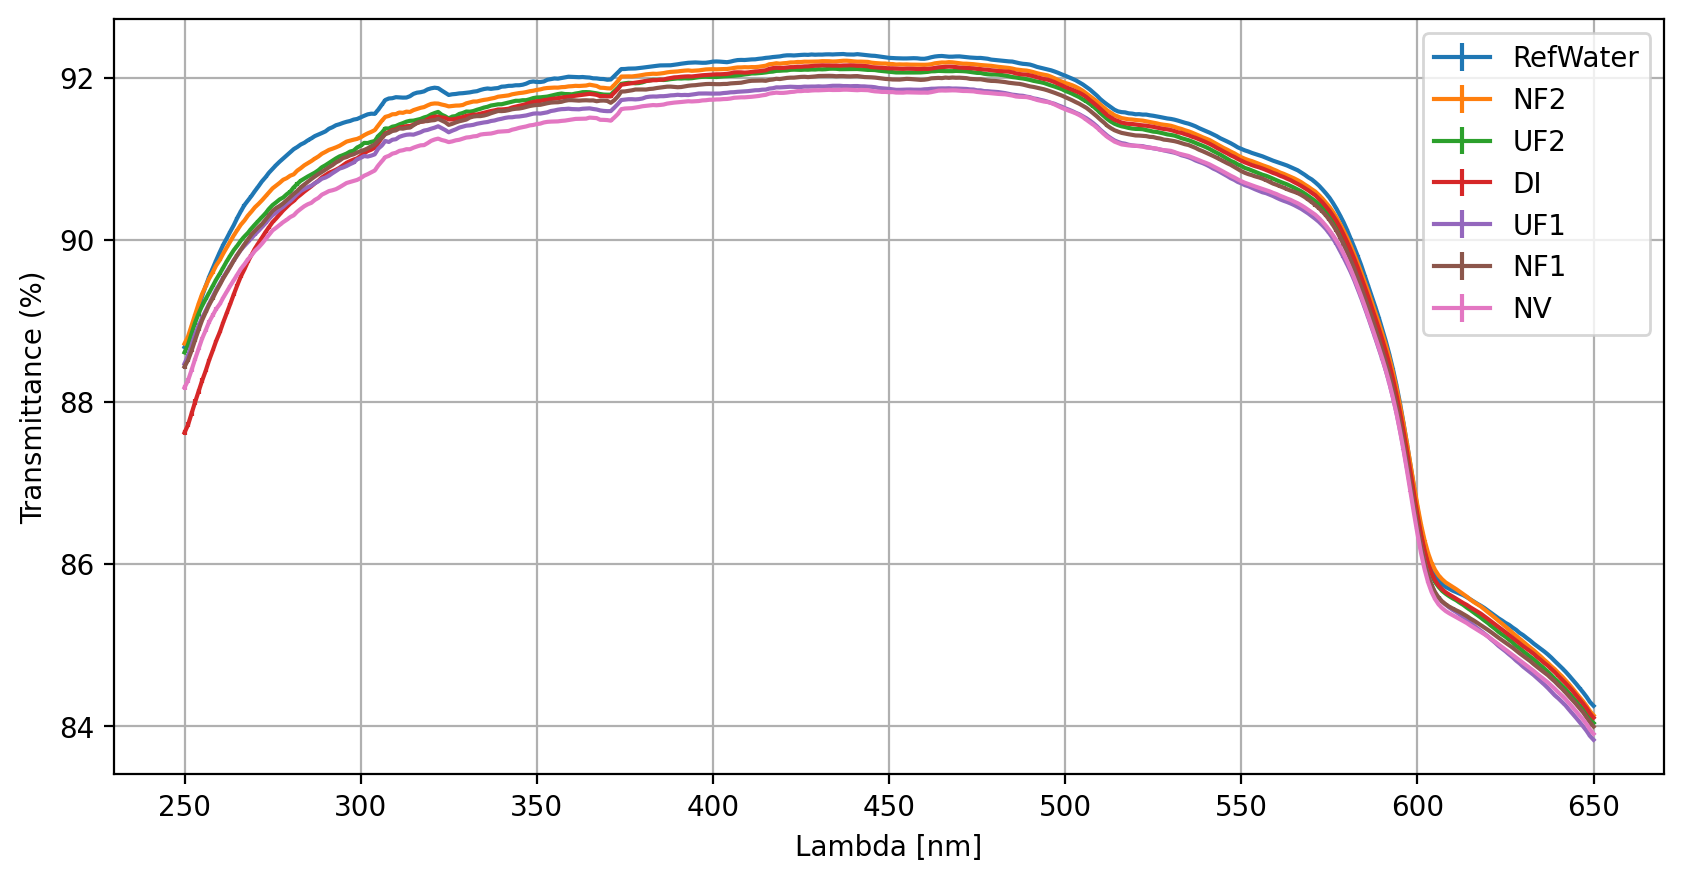

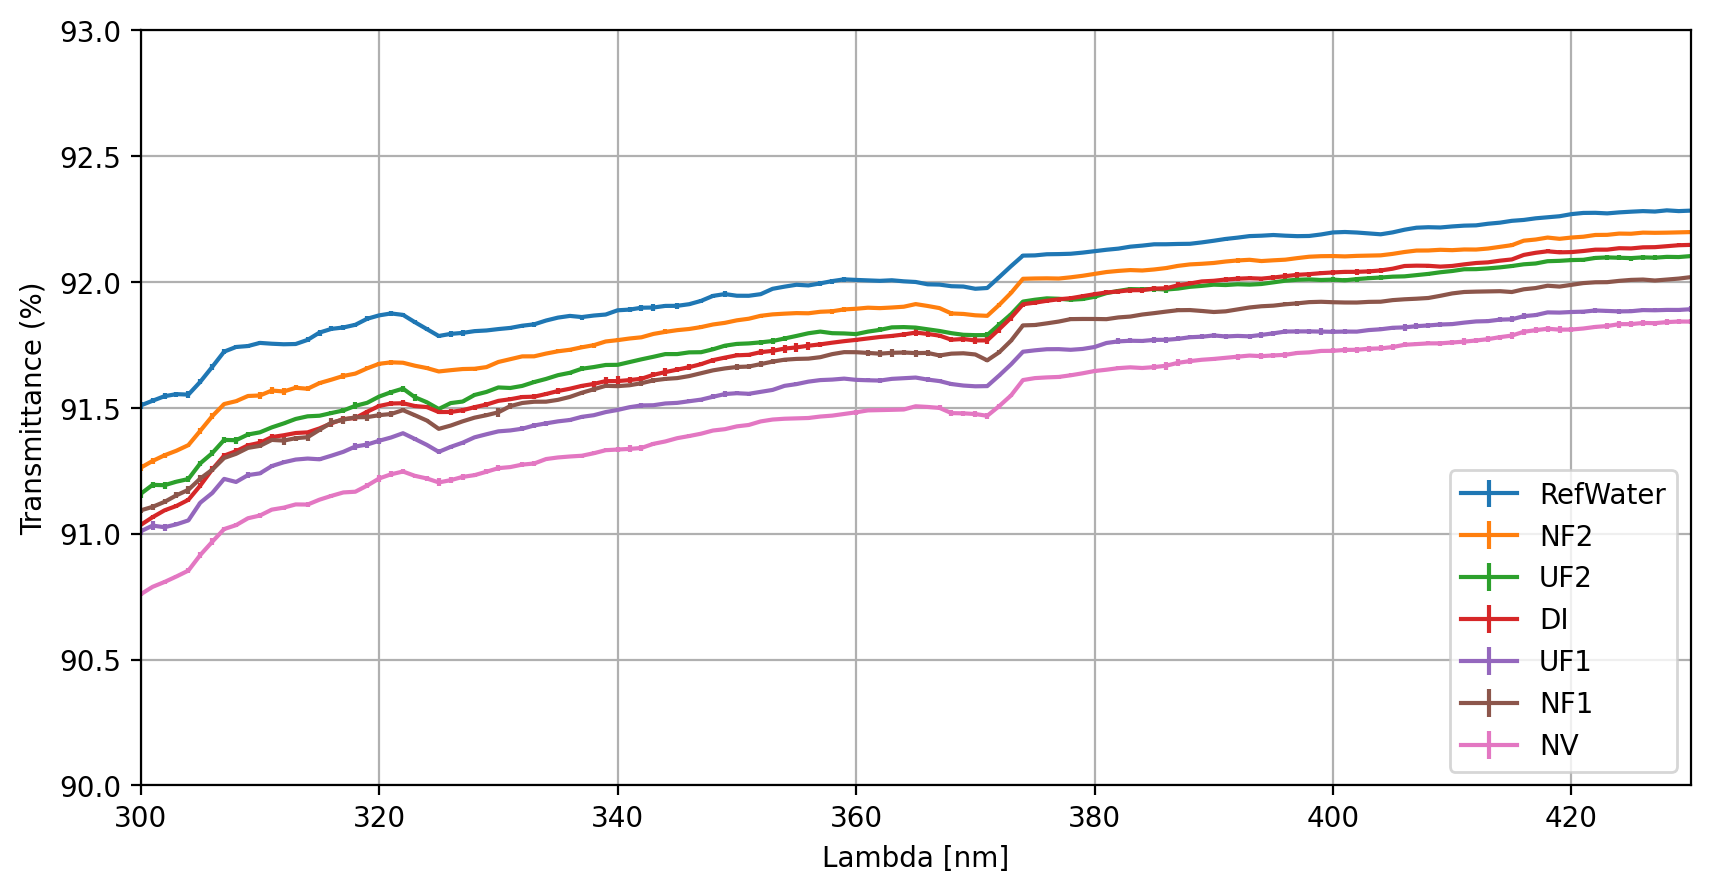

In [35]:
plt.figure(figsize=(10,5),dpi=200)
plt.xlabel("Lambda [nm]")
plt.ylabel("Transmittance (%)")
plt.errorbar(x=lambdas,y=r,yerr=r_err, label=reference_file[-25:-17])
plt.errorbar(x=lambdas,y=t_nf2,yerr=t_nf2_err, label="NF2")
plt.errorbar(x=lambdas,y=t_uf2,yerr=t_uf2_err, label="UF2")
plt.errorbar(x=lambdas,y=t_di,yerr=t_di_err, label="DI")
plt.errorbar(x=lambdas,y=t_uf1,yerr=t_uf1_err, label="UF1")
plt.errorbar(x=lambdas,y=t_nf1,yerr=t_nf1_err, label="NF1")
plt.errorbar(x=lambdas,y=t_nv,yerr=t_nv_err, label="NV")

plt.grid()
plt.legend()
plt.show()
plt.figure(figsize=(10,5),dpi=200)
plt.xlabel("Lambda [nm]")
plt.ylabel("Transmittance (%)")
plt.errorbar(x=lambdas,y=r,yerr=r_err, label=reference_file[-25:-17])
plt.errorbar(x=lambdas,y=t_nf2,yerr=t_nf2_err, label="NF2")
plt.errorbar(x=lambdas,y=t_uf2,yerr=t_uf2_err, label="UF2")
plt.errorbar(x=lambdas,y=t_di,yerr=t_di_err, label="DI")
plt.errorbar(x=lambdas,y=t_uf1,yerr=t_uf1_err, label="UF1")
plt.errorbar(x=lambdas,y=t_nf1,yerr=t_nf1_err, label="NF1")
plt.errorbar(x=lambdas,y=t_nv,yerr=t_nv_err, label="NV")




plt.xlim(300,430)
plt.ylim(90,93)
plt.grid()
plt.legend()
plt.show()

# Calcolo lunghezza di assorbimento

In [36]:
# Alpha_campione - Alpha_riferimento

def alpha_differences(reference,target):
    L = 0.3 
    return (1/L)*np.log(reference/target)

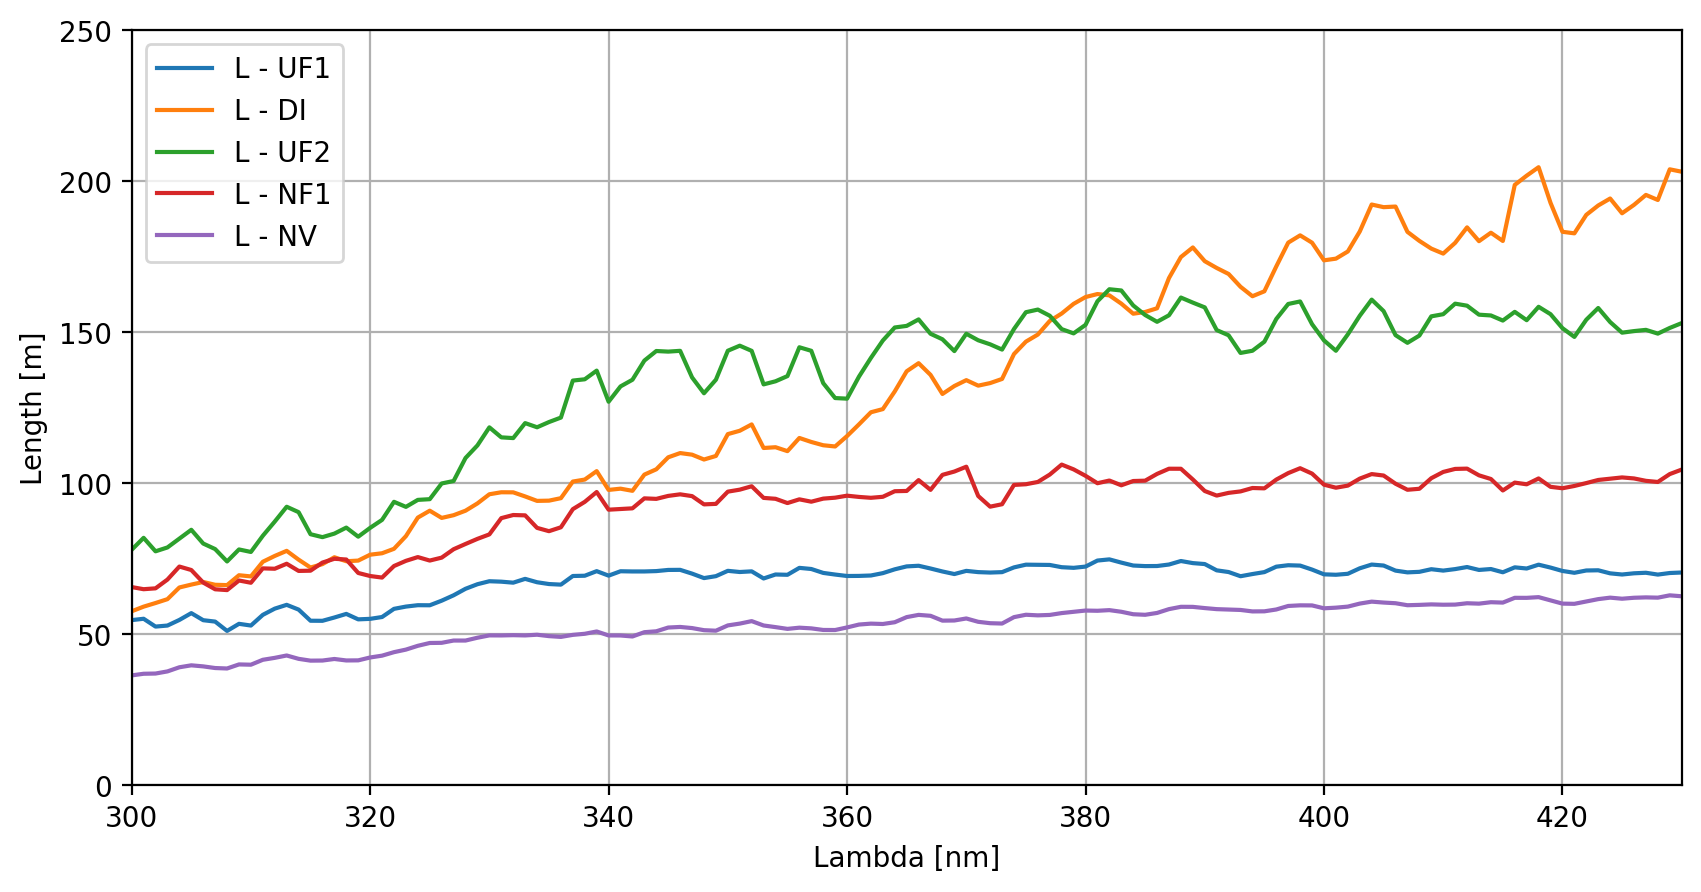

In [45]:
plt.figure(figsize=(10,5),dpi=200)
plt.xlabel("Lambda [nm]")
plt.ylabel("Length [m]")
plt.errorbar(x=lambdas, y=1 / alpha_differences(r, t_uf1), label="L - UF1" )
plt.errorbar(x=lambdas, y=1 / alpha_differences(r, t_di), label="L - DI" )
plt.errorbar(x=lambdas, y=1 / alpha_differences(r, t_uf2), label="L - UF2" )
plt.errorbar(x=lambdas, y=1 / alpha_differences(r, t_nf1), label="L - NF1" )
plt.errorbar(x=lambdas, y=1 / alpha_differences(r, t_nv), label="L - NV" )

plt.ylim(0,250)
plt.xlim(300,430)
plt.legend()
plt.grid()
plt.show()

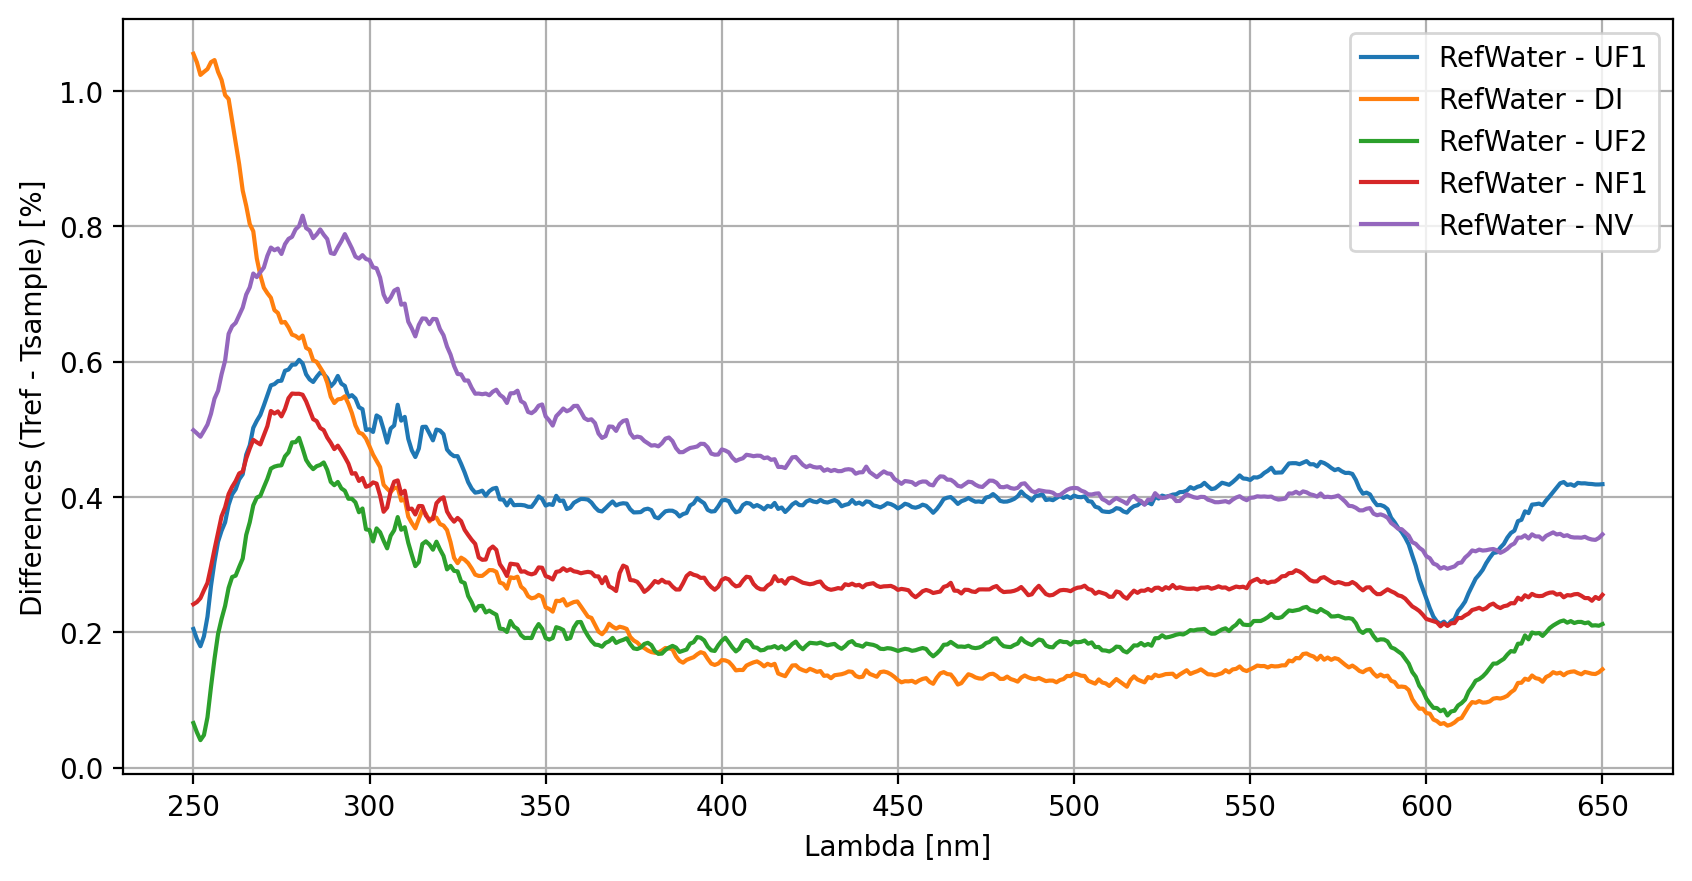

In [47]:
def Tdiff(r,t):
    return r-t
    


plt.figure(figsize=(10,5),dpi=200)
plt.xlabel("Lambda [nm]")
plt.ylabel("Differences (Tref - Tsample) [%]")
plt.errorbar(x=lambdas, y=Tdiff(r, t_uf1), label="RefWater - UF1" )
plt.errorbar(x=lambdas, y=Tdiff(r, t_di), label="RefWater - DI" )
plt.errorbar(x=lambdas, y=Tdiff(r, t_uf2), label="RefWater - UF2" )
plt.errorbar(x=lambdas, y=Tdiff(r, t_nf1), label="RefWater - NF1" )
plt.errorbar(x=lambdas, y=Tdiff(r, t_nv), label="RefWater - NV" )


plt.legend()
plt.grid()
plt.show()

# Cuvette vuota

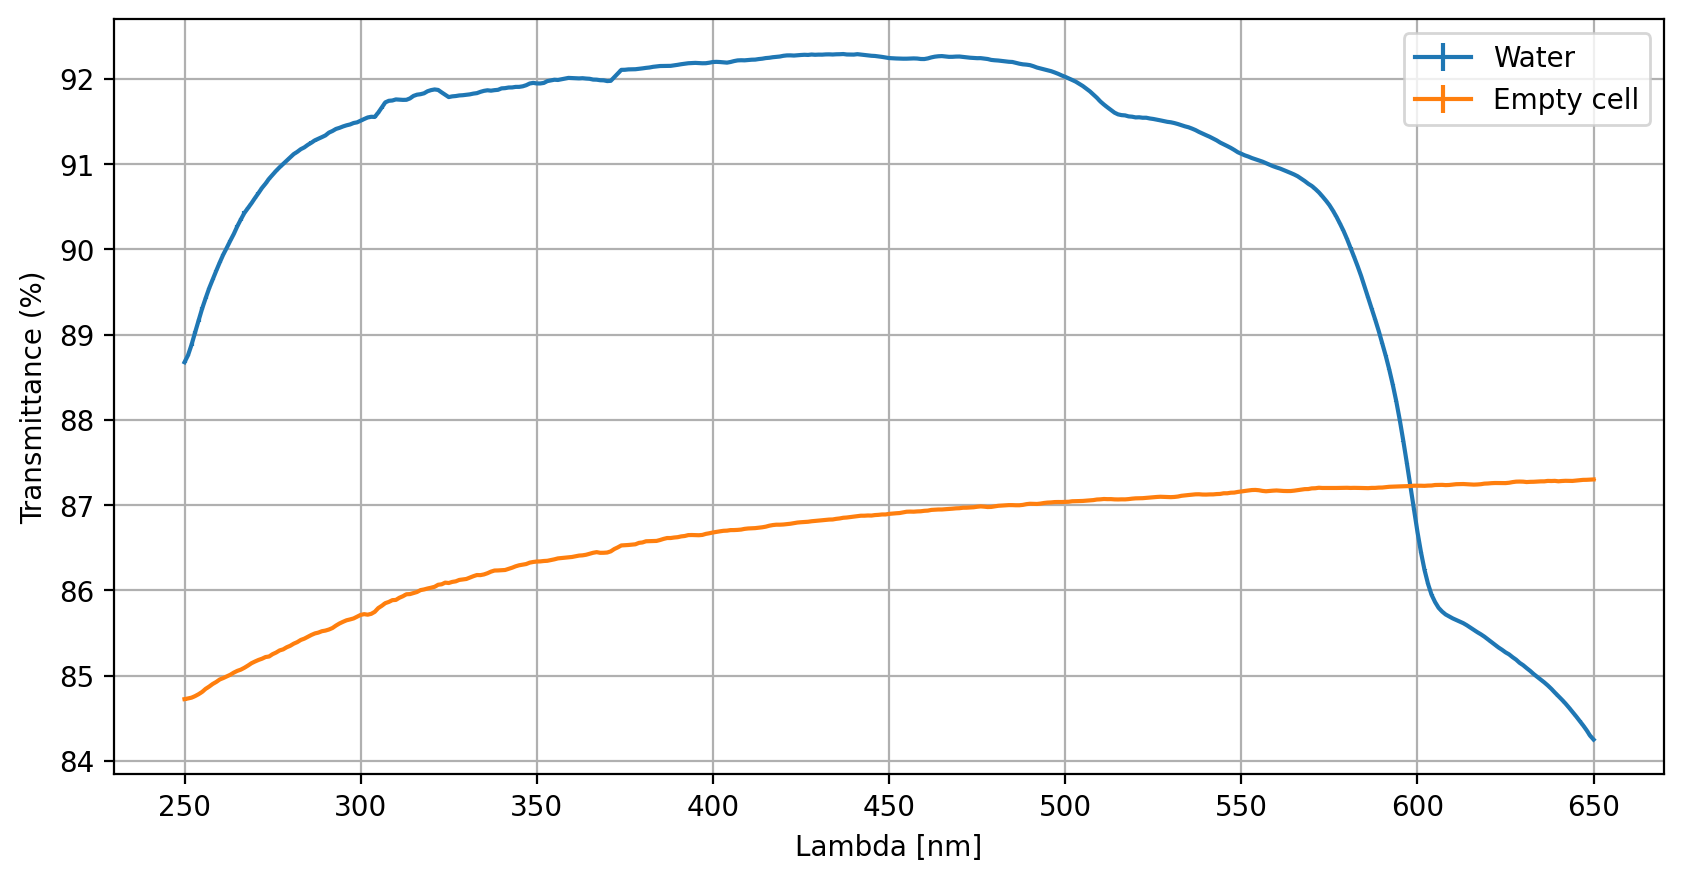

In [50]:
plt.figure(figsize=(10,5),dpi=200)
plt.xlabel("Lambda [nm]")
plt.ylabel("Transmittance (%)")

r_empty,r_empty_err = main.makingref("./transparency/mean/221025-Empty-2.csv")
plt.errorbar(x=lambdas,y=r,yerr=r_err, label="Water")
plt.errorbar(x=lambdas,y=r_empty,yerr=r_empty_err, label="Empty cell")
plt.grid()
plt.legend()
plt.show()